## Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import the dataset

In [33]:
dataset = pd.read_csv('df_tree.csv')
print(dataset.shape)

(291, 51)


In [34]:
dataset.head(6)

Unnamed: 0     Ba     Ca     Ce     Co     Cs     Cu     Eu     Fe  \
0     Li-K-Mn/MgO  False  False  False  False  False  False  False  False   
1    Li-Fe-Tb/MgO  False  False  False  False  False  False  False   True   
2    Li-Fe-Hf/MgO  False  False  False  False  False  False  False   True   
3  Na-Na-none/MgO  False  False  False  False  False  False  False  False   
4     Na-Ni-Y/MgO  False  False  False  False  False  False  False  False   
5    Na-Ce-Tb/MgO  False  False   True  False  False  False  False  False   

      Hf  ...     G5     G6     G7     G8     G9    G10    G11    G12    GLa  \
0  False  ...  False  False   True  False  False  False  False  False  False   
1  False  ...  False  False  False   True  False  False  False  False   True   
2   True  ...  False  False  False   True  False  False  False  False  False   
3  False  ...  False  False  False  False  False  False  False  False  False   
4  False  ...  False  False  False  False  False   True  False  False  False   
5  False  ...  False  False  False  False  False  False  False  False   True   

   Positive  
0     False  
1     False  
2     False  
3     False  
4     False  
5     False  

[6 rows x 51 columns]

In [35]:
data_top = dataset.keys()
print(data_top)
print(data_top[1:-1])
feature_names = data_top[1:-1]

Index(['Unnamed: 0', 'Ba', 'Ca', 'Ce', 'Co', 'Cs', 'Cu', 'Eu', 'Fe', 'Hf', 'K',
       'La', 'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Nd', 'Ni', 'Pd', 'Sr', 'Tb', 'Ti',
       'V', 'W', 'Y', 'Zn', 'Zr', 'Al2O3', 'BaO', 'CaO', 'CeO2', 'La2O3',
       'MgO', 'SiO2', 'TiO2', 'ZrO2', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7',
       'G8', 'G9', 'G10', 'G11', 'G12', 'GLa', 'Positive'],
      dtype='object')
Index(['Ba', 'Ca', 'Ce', 'Co', 'Cs', 'Cu', 'Eu', 'Fe', 'Hf', 'K', 'La', 'Li',
       'Mg', 'Mn', 'Mo', 'Na', 'Nd', 'Ni', 'Pd', 'Sr', 'Tb', 'Ti', 'V', 'W',
       'Y', 'Zn', 'Zr', 'Al2O3', 'BaO', 'CaO', 'CeO2', 'La2O3', 'MgO', 'SiO2',
       'TiO2', 'ZrO2', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9',
       'G10', 'G11', 'G12', 'GLa'],
      dtype='object')


In [36]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
print(X.shape)
print(y.shape)

(291, 49)
(291,)


## Randomly splitting the dataset into the training set and testing set

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(232, 49)
(232,)
(59, 49)
(59,)


## Training the decision tree classification model on training set

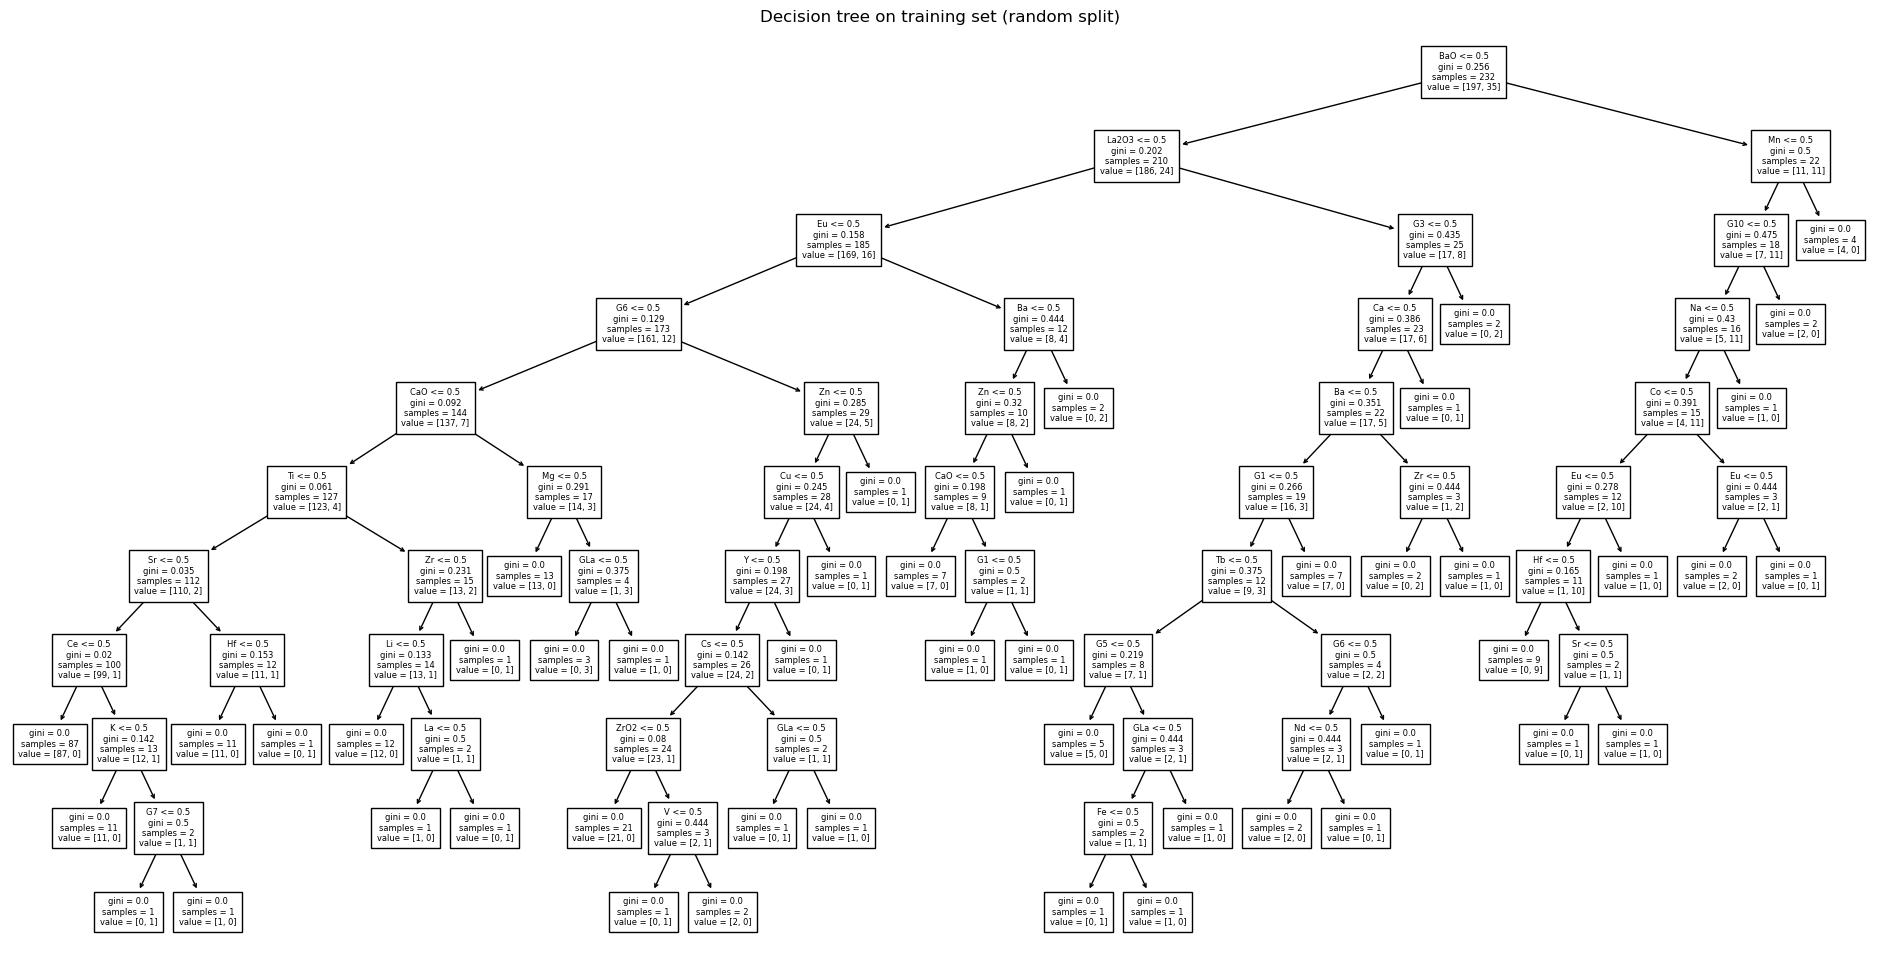

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(24,12))
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
plot_tree(clf, filled=False, fontsize=6, feature_names=feature_names)
plt.title("Decision tree on training set (random split)")
plt.show()

There exists some discrepancy between this tree and the tree in the paper ("paper tree"). Such discrepancy may be due to different training sets used. Based on the paper tree, we try to figure out the training-testing-split used in the paper to the greatest extent possible through reverse engineering. Basically, we let all 291 observations run through the paper tree, and get the set of observations in each terminal node. For each terminal node, we compare the set we get and the set specified in the paper, to figure out which observations belong to training set (or testing set). As a result, we successfully figure out 19 out of the 58 observations in testing set. For the other 39 observations, we randomly sample from the pool of observations which end up in same terminal node. We re-build the tree based on such mannually splitted data. Results are as follows:

## Manually splitting the dataset into the training set and testing set

In [2]:
train1 = pd.read_csv('df_tree_manual_TrainSample1.csv')
test1 = pd.read_csv('df_tree_manual_TestSample1.csv')
print(train1.shape)
print(test1.shape)

(233, 51)
(58, 51)


In [3]:
train1.head(6)

Name     Ba     Ca     Ce     Co     Cs     Cu     Eu     Fe   
0     Li-K-Mn/MgO  False  False  False  False  False  False  False  False  \
1    Li-Fe-Tb/MgO  False  False  False  False  False  False  False   True   
2    Li-Fe-Hf/MgO  False  False  False  False  False  False  False   True   
3  Na-Na-none/MgO  False  False  False  False  False  False  False  False   
4    Na-Ce-Tb/MgO  False  False   True  False  False  False  False  False   
5    Na-Tb-Hf/MgO  False  False  False  False  False  False  False  False   

      Hf  ...     G5     G6     G7     G8     G9    G10    G11    G12    GLa   
0  False  ...  False  False   True  False  False  False  False  False  False  \
1  False  ...  False  False  False   True  False  False  False  False   True   
2   True  ...  False  False  False   True  False  False  False  False  False   
3  False  ...  False  False  False  False  False  False  False  False  False   
4  False  ...  False  False  False  False  False  False  False  False   True   
5   True  ...  False  False  False  False  False  False  False  False   True   

   Positive  
0     False  
1     False  
2     False  
3     False  
4     False  
5     False  

[6 rows x 51 columns]

In [42]:
test1.head(6)

Name     Ba     Ca     Ce     Co     Cs     Cu     Eu     Fe  \
0       Na-Ni-Y/MgO  False  False  False  False  False  False  False  False   
1      Fe-Ce-Tb/MgO  False  False   True  False  False  False  False   True   
2  Li-Fe-none/Al2O3  False  False  False  False  False  False  False   True   
3    Na-Mn-Ni/Al2O3  False  False  False  False  False  False  False  False   
4     K-Mn-Ni/Al2O3  False  False  False  False  False  False  False  False   
5      K-Y-Hf/Al2O3  False  False  False  False  False  False  False  False   

      Hf  ...     G5     G6     G7     G8     G9    G10    G11    G12    GLa  \
0  False  ...  False  False  False  False  False   True  False  False  False   
1  False  ...  False  False  False   True  False  False  False  False   True   
2  False  ...  False  False  False   True  False  False  False  False  False   
3  False  ...  False  False   True  False  False   True  False  False  False   
4  False  ...  False  False   True  False  False   True  False  False  False   
5   True  ...  False  False  False  False  False  False  False  False  False   

   Positive  
0     False  
1     False  
2     False  
3     False  
4     False  
5     False  

[6 rows x 51 columns]

In [4]:
data_top = train1.keys()
print(data_top)
print(data_top[1:-1])
feature_names = data_top[1:-1]

Index(['Name', 'Ba', 'Ca', 'Ce', 'Co', 'Cs', 'Cu', 'Eu', 'Fe', 'Hf', 'K', 'La',
       'Li', 'Mg', 'Mn', 'Mo', 'Na', 'Nd', 'Ni', 'Pd', 'Sr', 'Tb', 'Ti', 'V',
       'W', 'Y', 'Zn', 'Zr', 'Al2O3', 'BaO', 'CaO', 'CeO2', 'La2O3', 'MgO',
       'SiO2', 'TiO2', 'ZrO2', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8',
       'G9', 'G10', 'G11', 'G12', 'GLa', 'Positive'],
      dtype='object')
Index(['Ba', 'Ca', 'Ce', 'Co', 'Cs', 'Cu', 'Eu', 'Fe', 'Hf', 'K', 'La', 'Li',
       'Mg', 'Mn', 'Mo', 'Na', 'Nd', 'Ni', 'Pd', 'Sr', 'Tb', 'Ti', 'V', 'W',
       'Y', 'Zn', 'Zr', 'Al2O3', 'BaO', 'CaO', 'CeO2', 'La2O3', 'MgO', 'SiO2',
       'TiO2', 'ZrO2', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9',
       'G10', 'G11', 'G12', 'GLa'],
      dtype='object')


In [5]:
X_train1 = train1.iloc[:, 1:-1].values
y_train1 = train1.iloc[:, -1].values
print(X_train1.shape)
print(y_train1.shape)

(233, 49)
(233,)


In [6]:
X_test1 = test1.iloc[:, 1:-1].values
y_test1 = test1.iloc[:, -1].values
print(X_test1.shape)
print(y_test1.shape)

(58, 49)
(58,)


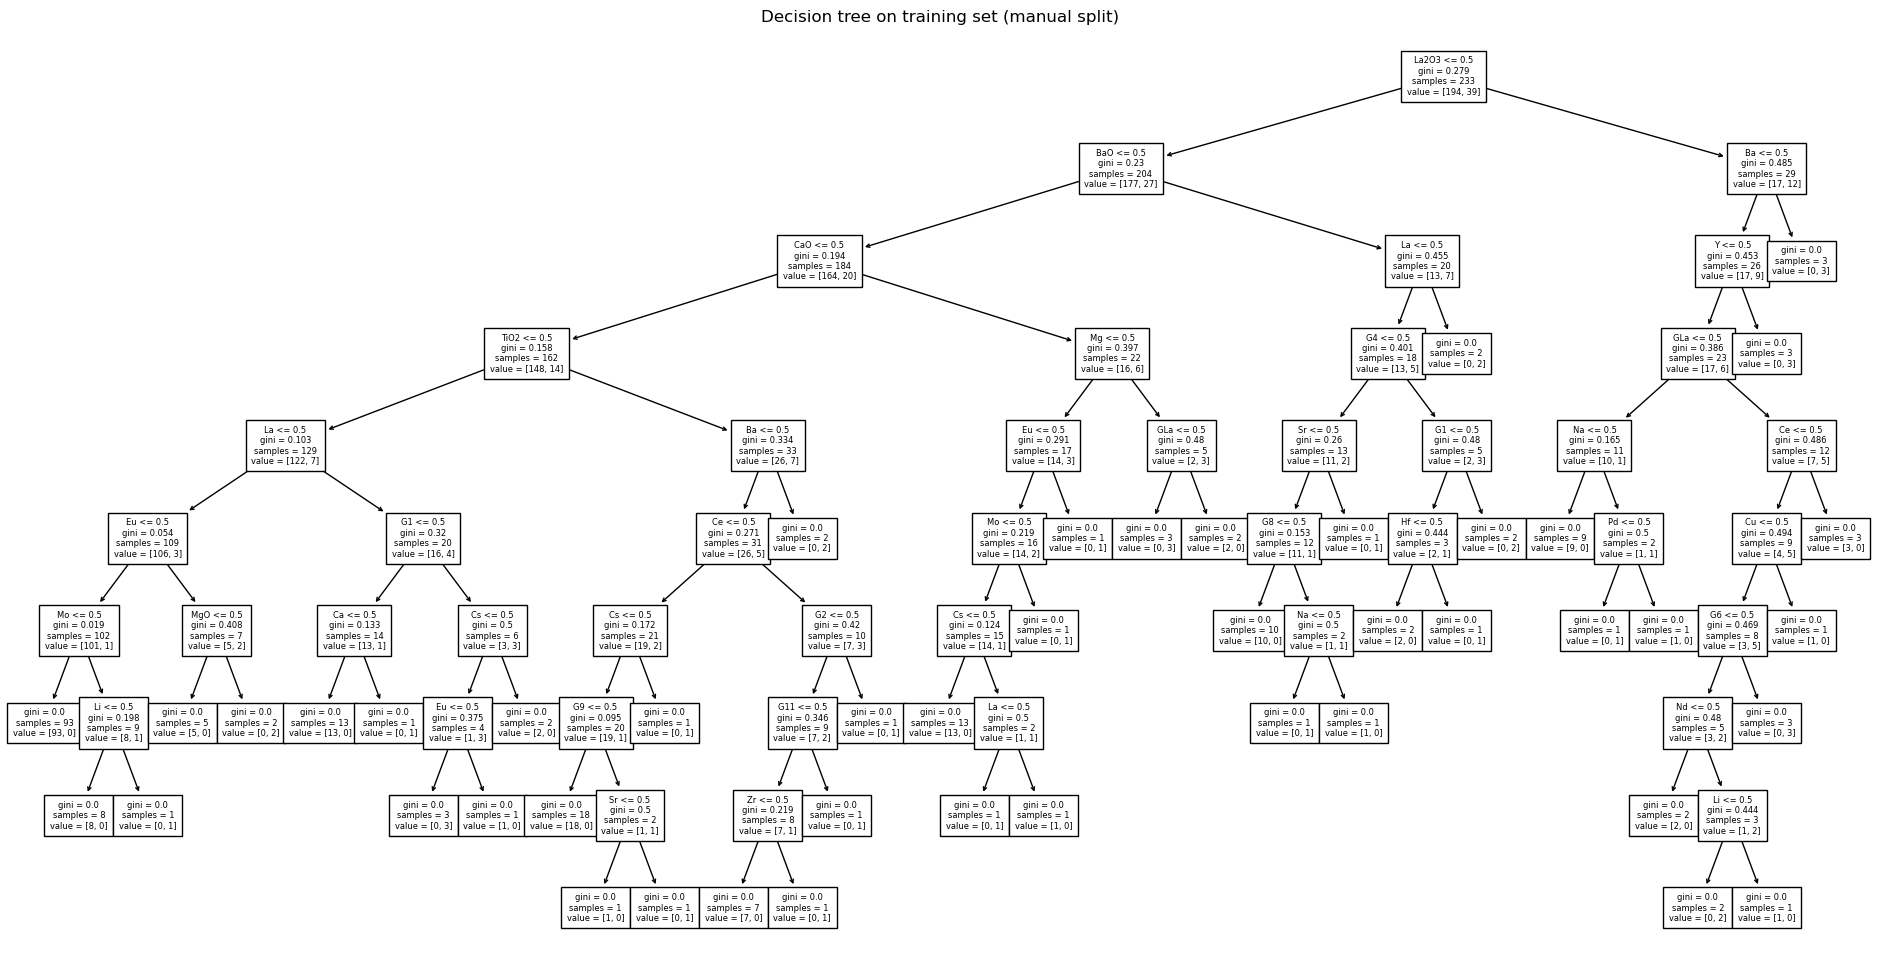

In [7]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(24,12))
clf1 = DecisionTreeClassifier(random_state=0).fit(X_train1, y_train1)
plot_tree(clf1, filled=False, fontsize=6, feature_names=feature_names)
plt.title("Decision tree on training set (manual split)")
plt.show()

This tree is much more similar to the paper tree, especially on the left hand side. Some discrepancy only exist in nodes with large depth or small node size.

## Prediction on testing set

In [8]:
y_pred1 = clf1.predict(X_test1)

## Making the confusion matrix

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
cm = confusion_matrix(y_test1, y_pred1)
print(cm)
accuracy_score(y_test1, y_pred1)

[[39  7]
 [ 7  5]]


0.7586206896551724

In [10]:
f1_score(y_test1, y_pred1) # to be checked. manual calculated f1_score = 0.8409

0.4166666666666667

In [50]:
print(y_test1)

[False False False False False False False False False False False False
 False False False False False False False  True False  True False False
  True False False False  True False False False False False  True False
 False False False False  True  True  True  True False False False  True
  True False False False False False  True False False False]


In [51]:
print(y_pred1)

[False False False False False False  True False False False False False
 False False  True False False  True  True  True False  True False False
  True False  True False False False False False  True False False False
 False False False False False False  True  True False  True  True  True
  True False False False  True False False False False False]


In [12]:
data_out = pd.read_csv('df_tree_val.csv')
data_out.head(6)

Name     Ba     Ca     Ce     Co     Cs     Cu     Eu     Fe   
0  Li-Y-Mo/La2O3  False  False  False  False  False  False  False  False  \
1  Li-Ca-La/SiO2  False   True  False  False  False  False  False  False   
2    Fe-Fe-W/BaO  False  False  False  False  False  False  False   True   
3   Mg-Mo-Hf/BaO  False  False  False  False  False  False  False  False   
4    K-Mo-La/BaO  False  False  False  False  False  False  False  False   
5  Co-Cu-Ba/TiO2   True  False  False   True  False   True  False  False   

      Hf  ...     G5     G6     G7     G8     G9    G10    G11    G12    GLa   
0  False  ...  False   True  False  False  False  False  False  False  False  \
1  False  ...  False  False  False  False  False  False  False  False   True   
2  False  ...  False   True  False   True  False  False  False  False  False   
3   True  ...  False   True  False  False  False  False  False  False  False   
4  False  ...  False   True  False  False  False  False  False  False   True   
5  False  ...  False  False  False  False   True  False   True  False  False   

   Positive  
0      True  
1     False  
2      True  
3      True  
4     False  
5     False  

[6 rows x 51 columns]

In [13]:
X_out = data_out.iloc[:, 1:-1].values
y_out = data_out.iloc[:, -1].values
print(X_out.shape)
print(y_out.shape)

(20, 49)
(20,)


In [14]:
y_pred_out = clf1.predict(X_out)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_out = confusion_matrix(y_out, y_pred_out)
print(cm_out)
accuracy_score(y_out, y_pred_out)

[[ 0  5]
 [ 2 13]]


0.65